WAP to create confusion matrix manualy using the given data of actual and predicted values, also calculate sensitivity, specificity and precision.

In [21]:
import pandas as pd
# Create DataFrame
actual=[1,0,1,1,0]
predicted=[1,0,0,1,1]
df=pd.DataFrame({'Actual':actual,'Predicted':predicted})
df

,Actual,Predicted
0,1,1
1,0,0
2,1,0
3,1,1
4,0,1


In [23]:
# Build confusion matrix

# TP=> Actual=1,Predicted=1
# TN=> Actual=0,Predicted=0
# FP=> Actual=0,Predicted=1
# FN=> Actual=1,Predicted=0

TP=sum((df['Actual'] & df['Predicted'])==1)
TN=sum((df['Actual']==0) & (df['Predicted']==0))
FP=sum((df['Actual']==0) & (df['Predicted']==1))
FN=sum((df['Actual']==1) & (df['Predicted']==0))
print(TP,TN,FP,FN)

2 1 1 1


In [25]:
sensitivity= TP / (TP + FN)
precision= TP / (TP + FP)
specificity= TN / (TN + FP)
print(sensitivity, precision, specificity)

0.6666666666666666 0.6666666666666666 0.5


## 253
You have been provided with a dataset named students_performance.csv, which contains various features related to students'
performance in exams. The dataset includes features such as gender, race/ethnicity, parental level of education, lunch, test
preparation course, and scores in math, reading, and writing. Your task is to perform classification to predict whether a student
will pass or fail based on these features.
Steps to complete:
1.Load the Dataset:
oLoad the dataset students_performance.csv into a pandas DataFrame.
oDisplay the first few rows to understand the structure of the dataset and check the staƟsƟcs.
2.Preprocessing:
oConvert the scores in math, reading, and wriƟng to a binary pass/fail label. Consider a score of 50 or above as pass(1) and
below 50 as fail(0).
oDrop the scores in math, reading, and wriƟng.
oCreate a new Column named ‘Overall_Pass’ and create a binary label: pass(1) if Student passes all heads (math, reading, and
writing) and fail(0) if student has failed in even one head.
oEncode categorical variables (gender, race/ethnicity, parental level of educaƟon, lunch, test preparaƟon course) using onehot encoding.
oHandle any missing values if present.
oSplit the dataset into features (x) and target (y) where the target is the pass/fail label for the math pass.
oSplit the data into training (80%) sets using random state 10.
3.KNN ClassificaƟon:
oImplement the KNN classifier.
oFind the opƟmal number of neighbors (k) based on the accuracy of the model.
oEvaluate the model on the tesƟng set using accuracy, sensiƟvity, and specificity.
4.Decision Tree ClassificaƟon:
oImplement the Decision Tree classifier.
oFind the opƟmal hyperparameters such as max_depth.
oEvaluate the model on the tesƟng set using accuracy, sensiƟvity, and specificity.
5.Comparison and Conclusion:
oCompare the performance of the KNN and Decision Tree classifiers based on the evaluaƟon metrics.
oDetermine which model performs beƩer for this dataset.
oPlot the evaluaƟon metrics comparison for both the models.


In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
df['mathPass']=np.where((df['math score']>=50),1,0)
df['readPass']=np.where((df['reading score']>=50),1,0)
df['writePass']=np.where((df['writing score']>=50),1,0)
df=df.drop(columns=['math score','reading score','writing score'],axis=1)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathPass,readPass,writePass
0,female,group B,bachelor's degree,standard,none,1,1,1
1,female,group C,some college,standard,completed,1,1,1
2,female,group B,master's degree,standard,none,1,1,1
3,male,group A,associate's degree,free/reduced,none,0,1,0
4,male,group C,some college,standard,none,1,1,1
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,1,1,1
996,male,group C,high school,free/reduced,none,1,1,1
997,female,group C,high school,free/reduced,completed,1,1,1
998,female,group D,some college,standard,completed,1,1,1


In [37]:
df['OverallPass']=np.where((df['mathPass']==1) & (df['readPass']==1) & (df['writePass']==1),1,0)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathPass,readPass,writePass,OverallPass
0,female,group B,bachelor's degree,standard,none,1,1,1,1
1,female,group C,some college,standard,completed,1,1,1,1
2,female,group B,master's degree,standard,none,1,1,1,1
3,male,group A,associate's degree,free/reduced,none,0,1,0,0
4,male,group C,some college,standard,none,1,1,1,1
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,1,1,1,1
996,male,group C,high school,free/reduced,none,1,1,1,1
997,female,group C,high school,free/reduced,completed,1,1,1,1
998,female,group D,some college,standard,completed,1,1,1,1


In [3]:
df.isna().sum()
category=['gender','race/ethnicity','parental level of education','lunch','test preparation course']
df_encoded=pd.get_dummies(df.drop(columns=['mathPass']),columns=category,drop_first=True)
x=df_encoded
y=df['mathPass']
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [4]:
bestk=1
bestacc=0
for k in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=k)

    knn.fit(x_train,y_train)

    y_pred=knn.predict(x_test)

    acc=accuracy_score(y_test,y_pred)
    
    if (acc>bestacc):
        bestk=k
        bestacc=acc
print(bestk,bestacc)
#train with best k        
knn=KNeighborsClassifier(n_neighbors=bestk)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
tp,fp,fn,tn=cm.ravel()

7 0.905


In [6]:
accknn=(tp+tn)/(tp+tn+fp+fn)
print('Accuracy: ',acc)
sensknn=(tp)/(tp+fp)
print('Sensitivity: ',sensknn)
specknn=(tn)/(tn+fp)
print('Specificity: ',specknn)

Accuracy:  0.9
Sensitivity:  0.4090909090909091
Specificity:  0.9297297297297298


In [9]:
from sklearn.tree import DecisionTreeClassifier
bestDepth=1
best_treeacc=0
for d in range(1,11):
    
    dtree=DecisionTreeClassifier(max_depth=d)
    dtree.fit(x_train,y_train)
    dtree_pred=dtree.predict(x_test)
    acc=accuracy_score(y_test,dtree_pred)
    
    if (acc>best_treeacc):
        bestDepth=d
        best_treeacc=acc
        
print(bestDepth,best_treeacc)
#train with best depth 
dtree=DecisionTreeClassifier(max_depth=bestDepth)
dtree.fit(x_train,y_train)
yd_pred=dtree.predict(x_test)

4 0.92


In [10]:
cm=confusion_matrix(y_test,yd_pred)
tp,fp,fn,tn=cm.ravel()
acctree=(tp+tn)/(tp+tn+fp+fn)
print('Accuracy: ',acc)
senstree=(tp)/(tp+fp)
print('Sensitivity: ',sensknn)
spectree=(tn)/(tn+fp)
print('Specificity: ',specknn)

Accuracy:  0.89
Sensitivity:  0.4090909090909091
Specificity:  0.9297297297297298


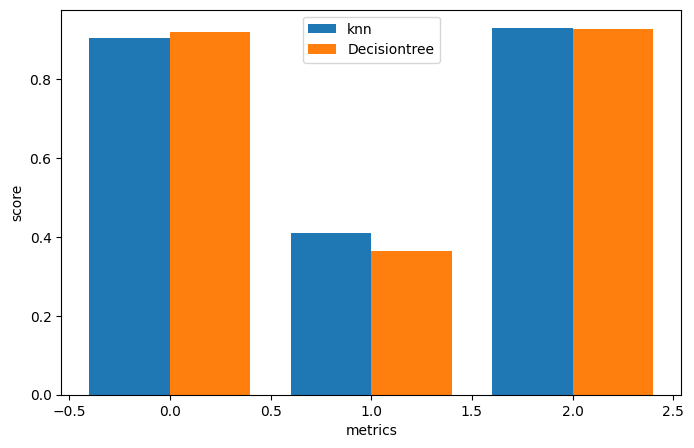

In [11]:
import matplotlib.pyplot as plt
metrics=['Accuracy','Sensitivity','Specificity']
knnscore=[accknn,sensknn,specknn]
treescore=[acctree,senstree,spectree]

x=np.arange(len(metrics))
plt.figure(figsize=(8,5))
plt.bar(x-0.2,knnscore,width=0.4,label='knn')
plt.bar(x+0.2,treescore,width=0.4,label='Decisiontree')
plt.xlabel('metrics')
plt.ylabel('score')
plt.legend()
plt.show()

In [48]:
# import sklearn
# print(sklearn.__version__)

1.3.2
